# Clasificador KNN 

In [2]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt
from scipy import signal
import seaborn as sns
import os #
import sys

## Cargar Dataset

In [3]:
mainpath= "Este_real_.txt"
data = pd.read_csv(mainpath)
data.head()

EjeX      EjeY  Frecuencia
0  6.977357  0.007939           7
1  7.000000  0.017552           7
2  6.970405  0.011817           7
3  6.961538  0.006295           7
4  4.961538  0.005922           7

In [4]:
data.groupby("Frecuencia").size()

Frecuencia
4    29
5    30
6    30
7    30
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Vectores de entrenamiento

In [6]:
x=np.array(data.drop(["Frecuencia"], 1))
y=np.array(data["Frecuencia"])
y

array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int64)

In [7]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.1)
print("Datos para Entrenar: %d y Datos para testear: %d"%(x_train.shape[0],x_test.shape[0]))

Datos para Entrenar: 107 y Datos para testear: 12


### Entrenamiento y muestra de resultados

In [8]:

n_neighbors = 14

knn = KNeighborsClassifier(n_neighbors)
knn.fit(x_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(x_test, y_test)))


Accuracy of K-NN classifier on training set: 0.71
Accuracy of K-NN classifier on test set: 0.92


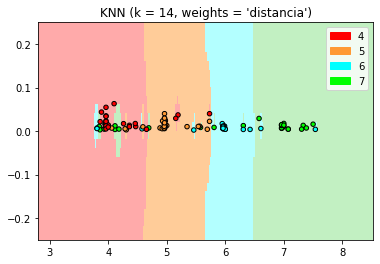

In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
h = 0.02

# Crear el mapa de colores
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])
 
# Se crea la instancia del clasificador KNN y se entrena el modelo
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(x, y)
 
# Plotear los "vecindarios". Asignando un color a cada uno de ellos.
# Puntos en la malla = [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
# El resultado se reproduce en un color plot (pcolormesh)
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
# Plotear los puntos de entrenamiento
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(-0.25, 0.25)
    
patch0 = mpatches.Patch(color='#FF0000', label='4')
patch1 = mpatches.Patch(color='#ff9933', label='5')
patch3 = mpatches.Patch(color='#00ffff', label='6')
patch4 = mpatches.Patch(color='#00FF00', label='7')
plt.legend(handles=[patch0, patch1, patch3,patch4])
 
weights='distancia'
plt.title("KNN (k = %i, weights = '%s')"
              % (n_neighbors, weights))
 
plt.show()

### Factor de selección del número de "

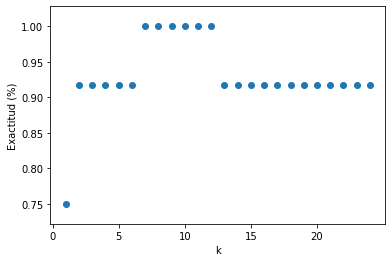

In [13]:
k_range = range(1, 25)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('Exactitud (%)')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()